In [2]:
!pip install imblearn

     |████████████████████████████████| 163 kB 1.9 MB/s 
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
  Using cached scikit_learn-0.22.2.post1-cp37-cp37m-macosx_10_9_x86_64.whl (7.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Class imbalance

- What is it?
- Why might we care about it?
- How can we deal with it?


## What is it?

In [2]:
df = pd.read_csv('~/PythonClass/Spiced/gradient_garlic-code_Work/Week_04/Day_4/creditcard.csv', index_col=0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check for null values
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V13       False
V15       False
V16       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [4]:
# inspect the class sizes
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [5]:
# calculate the percentage of observations belonging to class 1
df.groupby('Class').size()[1]/df.shape[0]*100

0.1727485630620034

## Why is it a Problem

- Because the classifier has an "incentive" to rather predict class 0. It just shows up so much more.

## How can we deal with it?

In [6]:
def print_evaluations(ytrue, ypred, model):
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #print confusion matrix
    fig = plt.figure(figsize=(15, 15))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-fraud', 'fraud']); ax.yaxis.set_ticklabels(['non-fraud', 'fraud'])

#### Split the data

In [7]:
X = df.iloc[:,:-1]
y = df.Class

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213605, 27), (71202, 27), (213605,), (71202,))

#### Build a simple baseline model

In [9]:
ypred_bl = [0] * X.shape[0]
len(ypred_bl)

284807

How does model Baseline score:
The accuracy of the model is: 0.998


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision of the model is: 0.0
The recall of the model is: 0.0
The f1-score of the model is: 0.0
[[284315      0]
 [   492      0]]


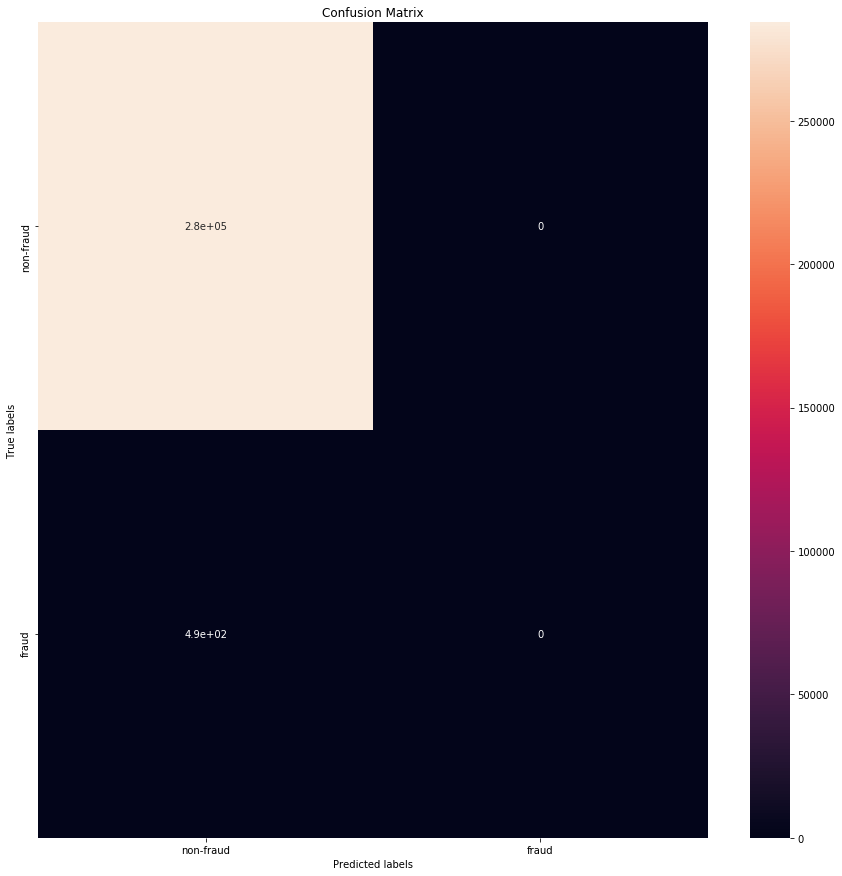

In [10]:
print_evaluations(y, ypred_bl, 'Baseline')

#### Compare it to a random forest classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [13]:
ypred_rf = rf.predict(X_test)

How does model RandomForest score:
The accuracy of the model is: 0.999
The precision of the model is: 0.894
The recall of the model is: 0.488
The f1-score of the model is: 0.631
[[71074     7]
 [   62    59]]


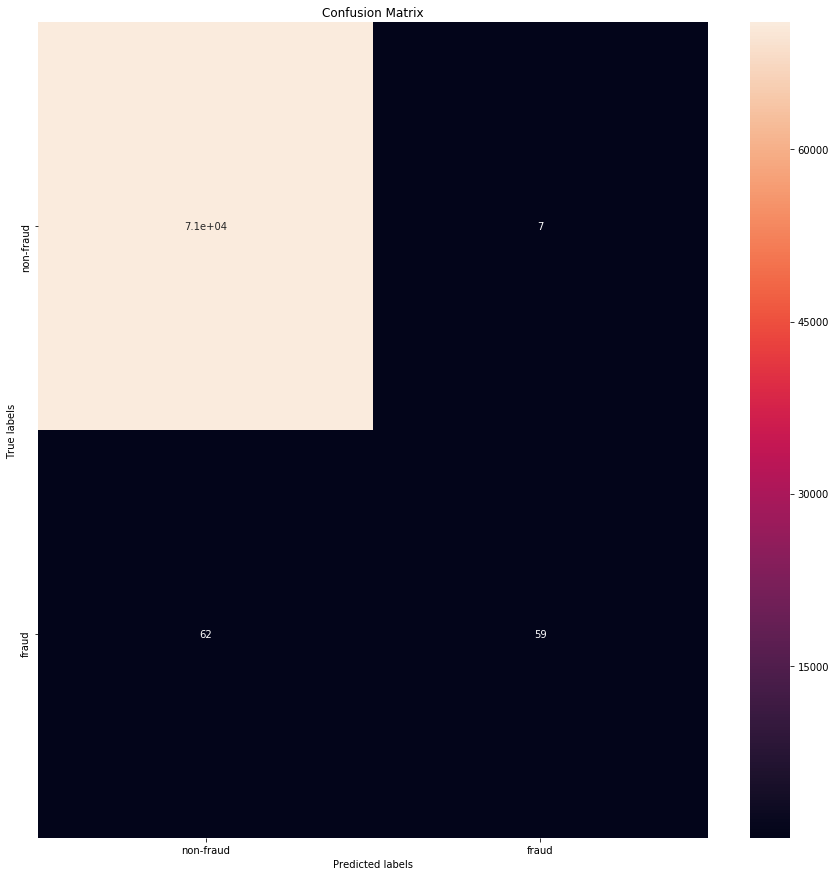

In [14]:
print_evaluations(y_test, ypred_rf, 'RandomForest')

### Use Undersampling

In [15]:
!pip install imbalanced-learn

In [19]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [21]:
rus = RandomUnderSampler(random_state=10, sampling_strategy={0: 20000})
nm = NearMiss(sampling_strategy={0: 20000})

In [22]:
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_nm, y_nm = nm.fit_resample(X_train, y_train)

In [ ]:
X_rus.shape, y_rus.shape, np.unique(y_rus, return_counts=True)

In [ ]:
rf.fit(X_rus, y_rus)
ypred_rus = rf.predict(X_test)
print_evaluations(y_test, ypred_rus, 'RandomUndersampling')

In [ ]:
rf.fit(X_nm, y_nm)
ypred_nm = rf.predict(X_test)
print_evaluations(y_test, ypred_nm, 'NearMiss')

### Use Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [1]:
ros = RandomOverSampler(random_state=10, sampling_strategy={1: 2000})

NameError: name 'RandomOverSampler' is not defined

In [ ]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
np.unique(y_ros, return_counts=True)

In [ ]:
rf.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)
print_evaluations(y_test, ypred_ros, 'RandomOversampling')